In [25]:
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("C:/Users/USER/train.csv")
test = pd.read_csv("C:/Users/USER/test.csv")

#날짜 파생변수 생성
#날짜 데이터 이해 위해 TIMESTAMP 생성 년/월/요일/주 파생변수 생성
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])
df = pd.concat([train,test]).reset_index(drop = True)

df.rename(columns={'supply(kg)':'supply', 'price(원/kg)':'price'},inplace=True)

#년/월/일 추가
df['year']=df['timestamp'].dt.year
df['month']=df['timestamp'].dt.month
df['day']=df['timestamp'].dt.day

#요일 추가
df['week_day']=df['timestamp'].dt.weekday

# 년-월 변수 추가 : year-month의 형태, 개월단위 누적값
le = LabelEncoder()
df["year_month"] = df["timestamp"].map(lambda x :str(x.year) + "-"+str(x.month))

# 라벨 인코딩
df["year_month"] = le.fit_transform(df["year_month"])


# 주차 변수 추가
df["week"] = df["timestamp"].map(lambda x: datetime.datetime(x.year, x.month, x.day).isocalendar()[1])

# 주차 누적값
week_list=[]
for i in range(len(df['year'])) :
    if df['year'][i] == 2019 :
        week_list.append(int(df['week'][i]))
    elif df['year'][i] == 2020 :
        week_list.append(int(df['week'][i])+52)
    elif df['year'][i] == 2021 :
        week_list.append(int(df['week'][i])+52+53)
    elif df['year'][i] == 2022 :
        week_list.append(int(df['week'][i])+52+53+53)
    elif df['year'][i] == 2023 :
        week_list.append(int(df['week'][i])+52+53+53+52)
df['week_num']= week_list

In [26]:
kr_holi = holidays.KR()

df["holiday"] = df["timestamp"].map(lambda x : make_holi(x))
    
# train, test 분리하기
train = df[~df["price"].isnull()].sort_values("timestamp").reset_index(drop = True)
test = df[df["price"].isnull()].sort_values("timestamp").reset_index(drop=True)

print(f"전처리 후 train 크기 : {train.shape}")
print(f"전처리 후 test 크기 : {test.shape}")

전처리 후 train 크기 : (59397, 15)
전처리 후 test 크기 : (1092, 15)


In [36]:
train

,ID,timestamp,item,corporation,location,supply,price,year,month,day,week_day,year_month,week,week_num,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1,0,1,1,1
1,CB_A_S_20190101,2019-01-01,CB,A,S,0.0,0.0,2019,1,1,1,0,1,1,1
2,RD_D_J_20190101,2019-01-01,RD,D,J,0.0,0.0,2019,1,1,1,0,1,1,1
3,BC_D_J_20190101,2019-01-01,BC,D,J,0.0,0.0,2019,1,1,1,0,1,1,1
4,CB_F_J_20190101,2019-01-01,CB,F,J,0.0,0.0,2019,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,CR_E_S_20230303,2023-03-03,CR,E,S,0.0,0.0,2023,3,3,4,50,9,219,0
59393,BC_A_S_20230303,2023-03-03,BC,A,S,3776.0,2875.0,2023,3,3,4,50,9,219,0
59394,CB_E_J_20230303,2023-03-03,CB,E,J,0.0,0.0,2023,3,3,4,50,9,219,0
59395,BC_D_J_20230303,2023-03-03,BC,D,J,1776.0,3059.0,2023,3,3,4,50,9,219,0


<Axes: xlabel='week_day', ylabel='price'>

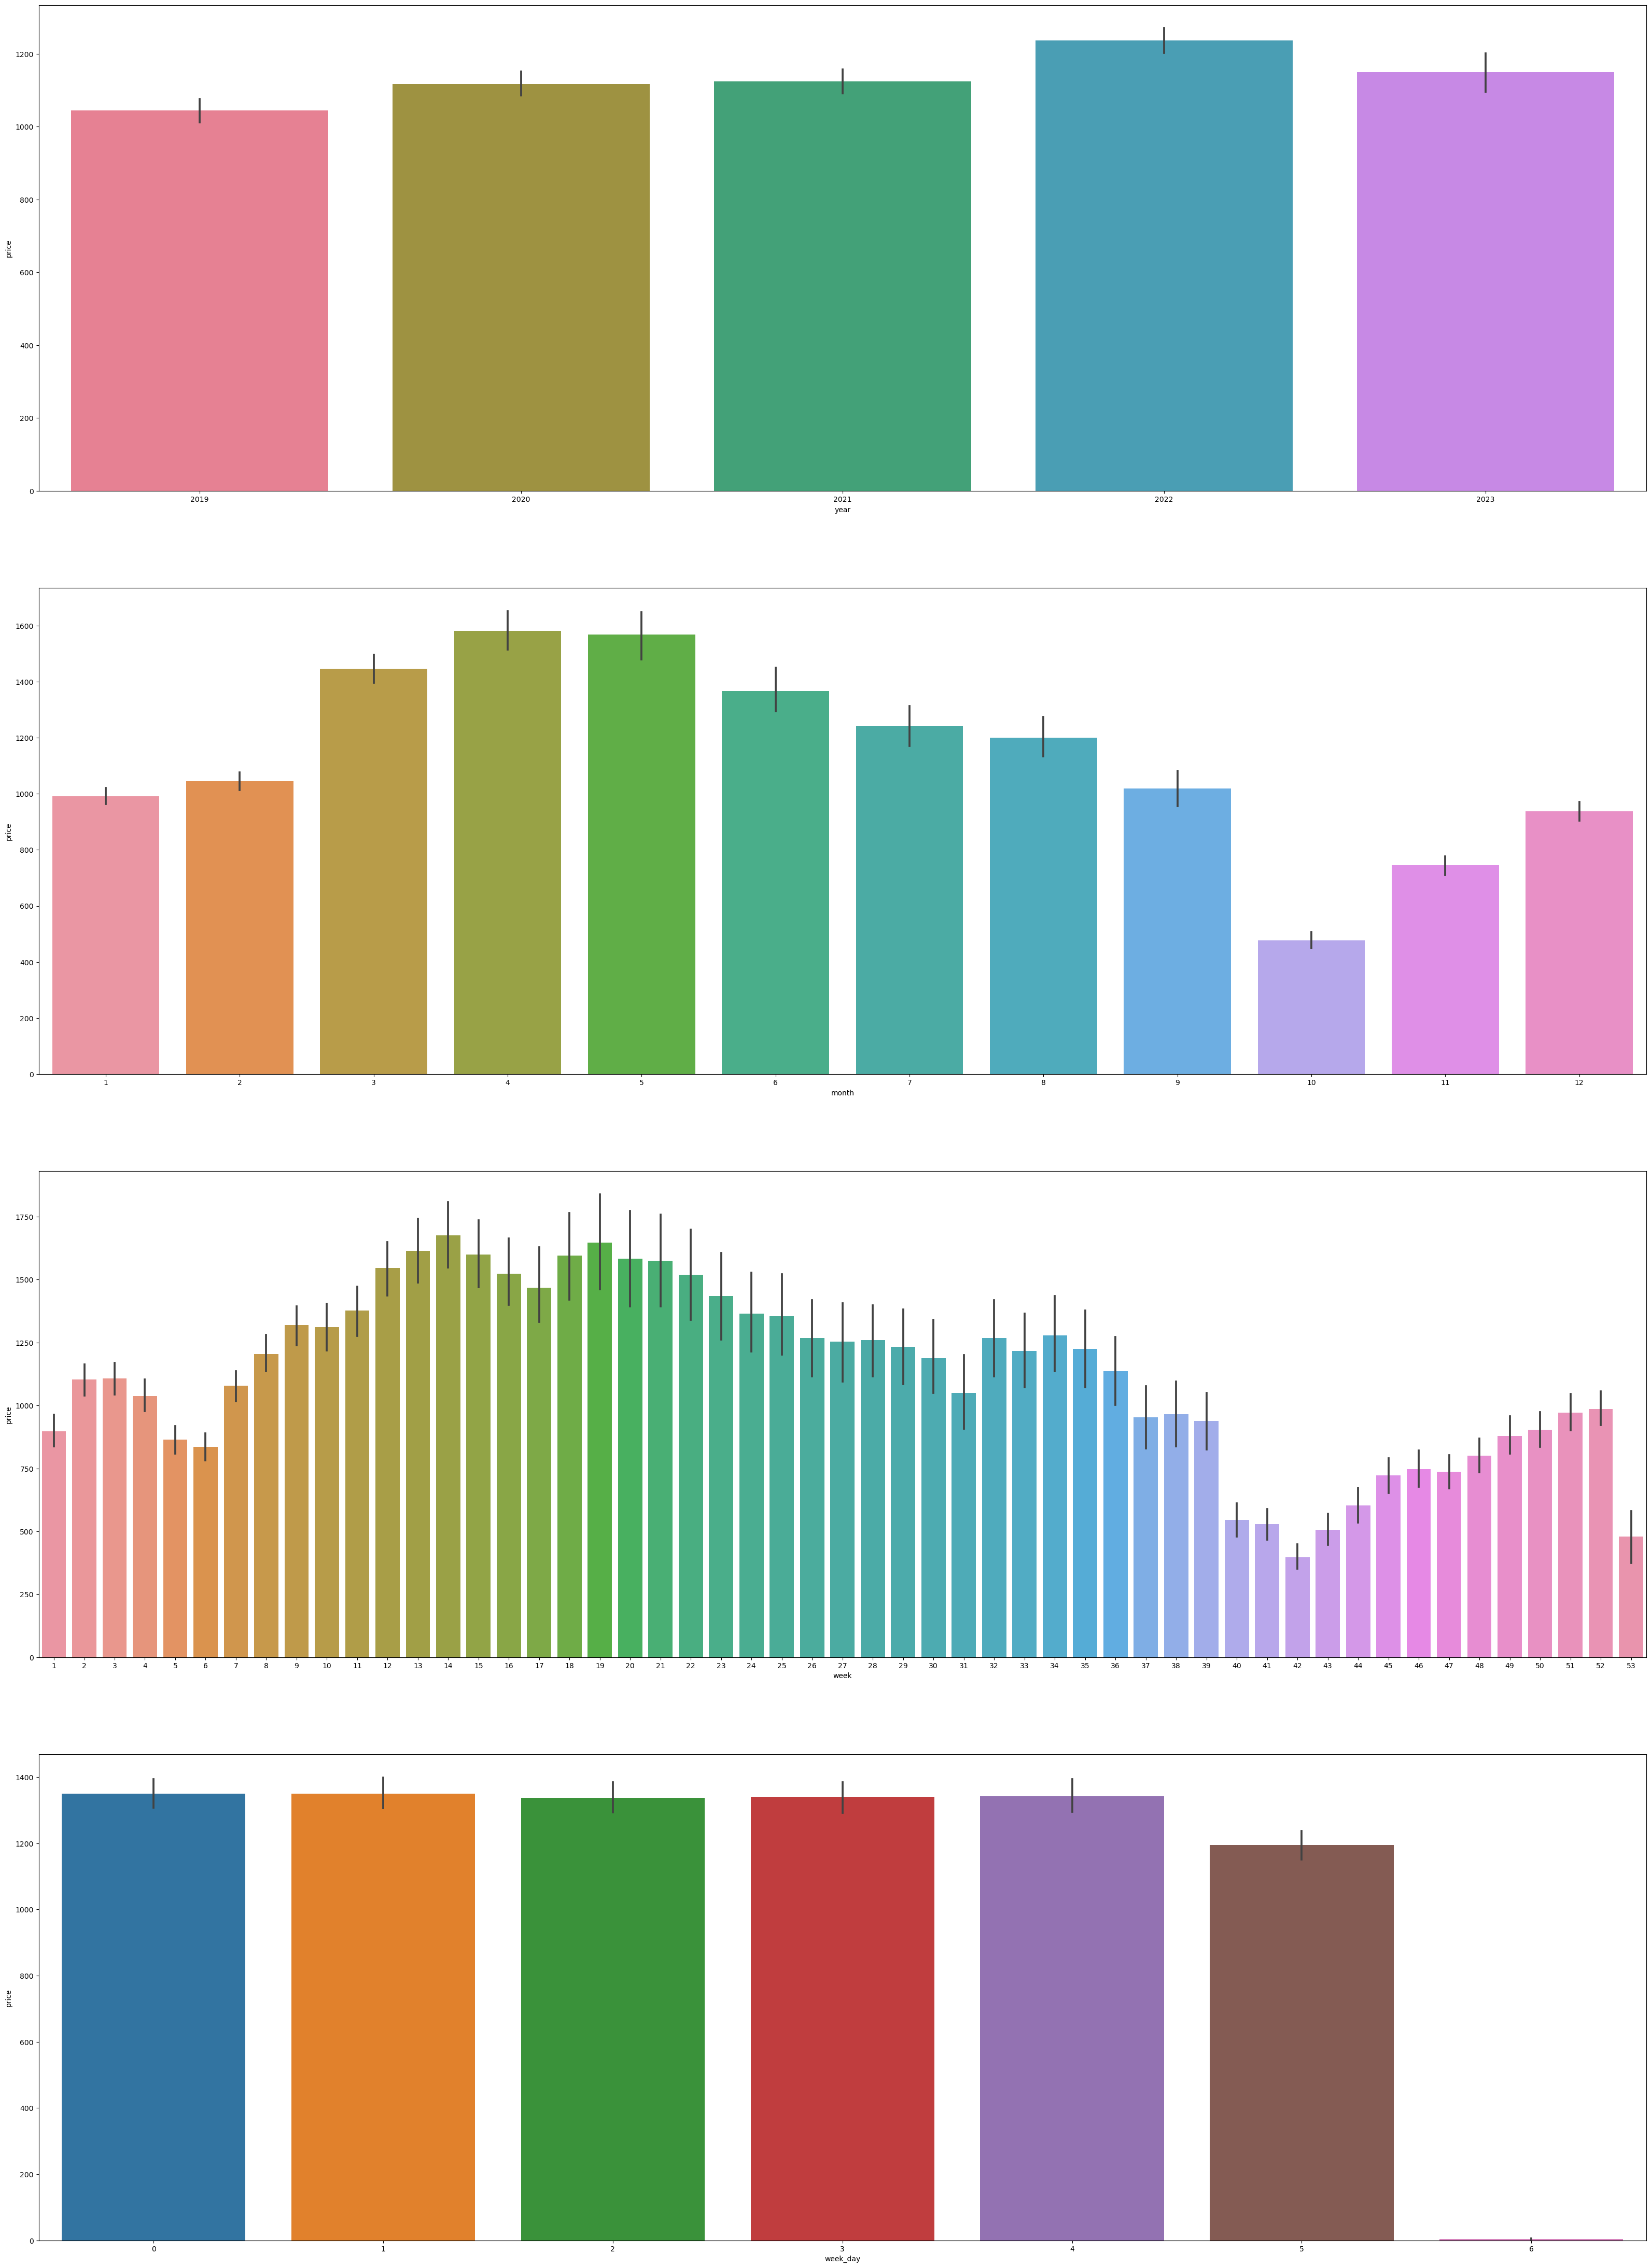

In [41]:
# 주기별 가격 확인

fig, axes = plt.subplots(4, 1, figsize=(40, 56))

sns.barplot(data=train,x='year',y='price',ax=axes[0],palette='husl',labelsize=12)
sns.barplot(data=train,x='month',y='price',ax=axes[1],labelsize=12)
sns.barplot(data=train,x='week',y='price',ax=axes[2],labelsize=12)
sns.barplot(data=train,x='week_day',y='price',ax=axes[3],labelsize=12)

<Axes: xlabel='week_num', ylabel='price'>

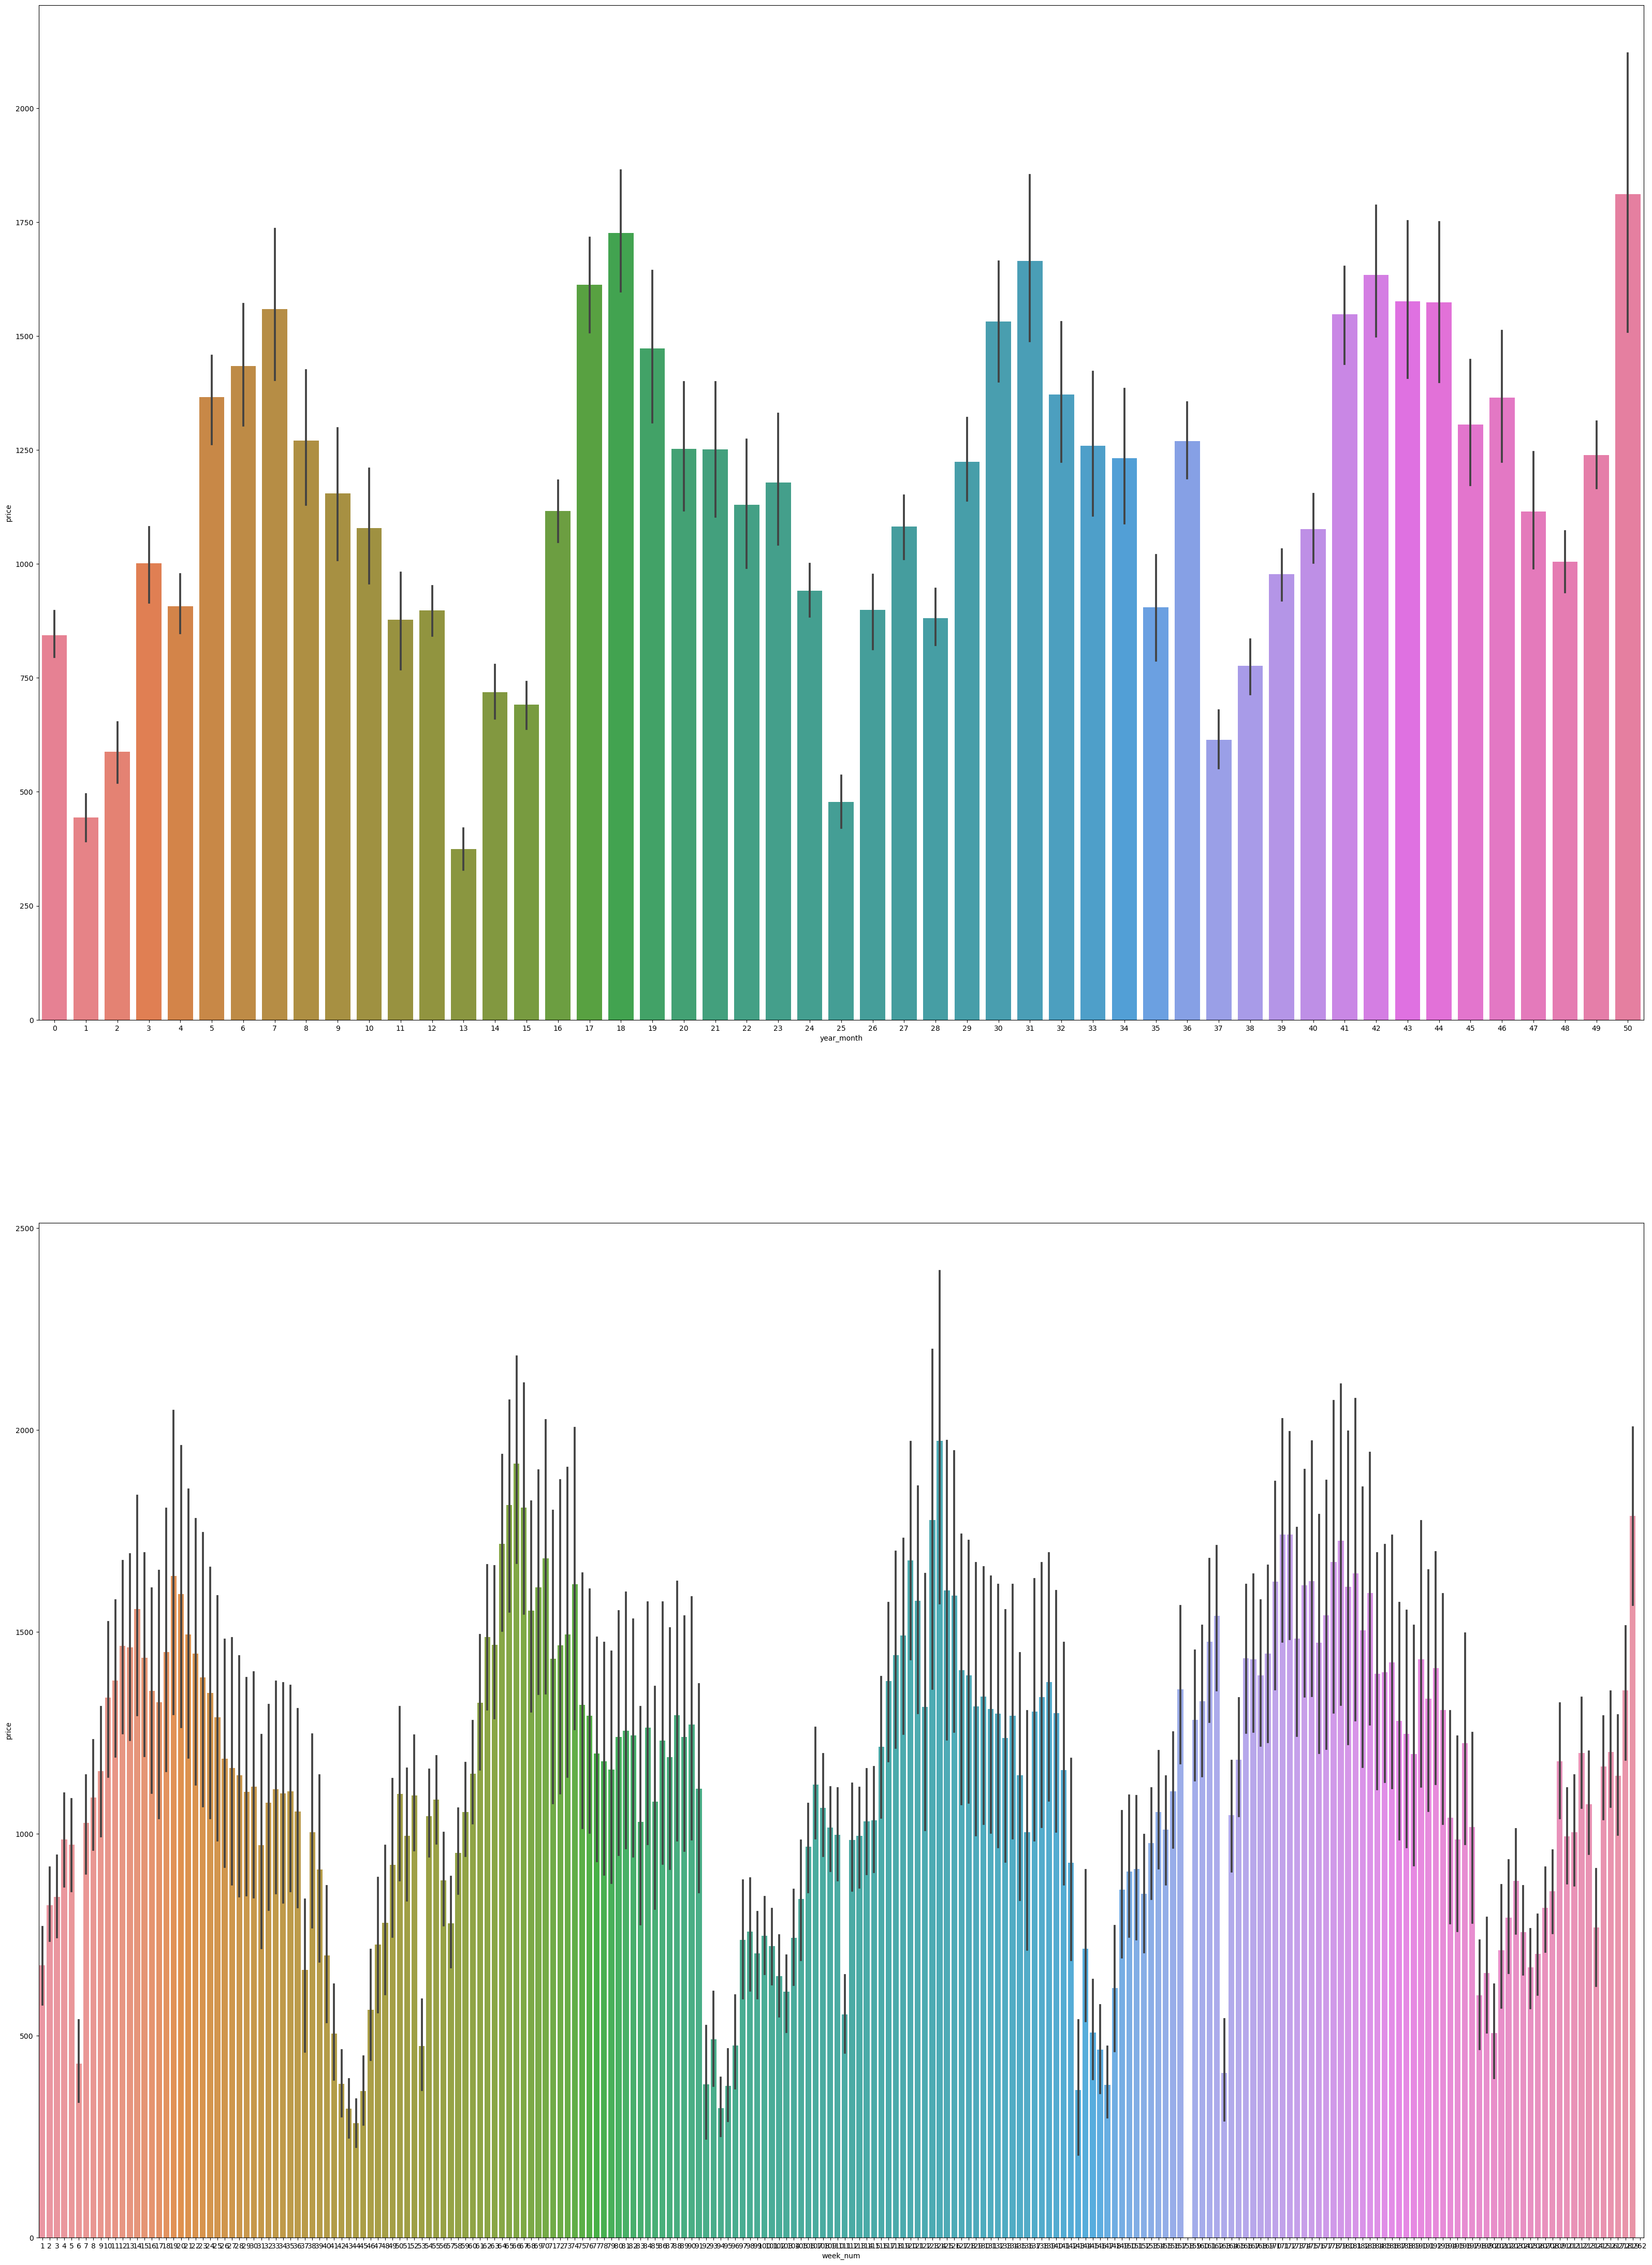

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(40, 56))

sns.barplot(data=train,x='year_month',y='price',ax=axes[0],palette='husl')
sns.barplot(data=train,x='week_num',y='price',ax=axes[1])